In [1]:
from pathlib import Path
from os.path import expanduser
from os import path
import numpy as np
import sys
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import os

In [2]:
max_dataset_size = 6000000
waveform_length = 72;
nb_of_elements = 100000
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [3]:
root_folder = os.path.dirname(os.getcwd())
path_to_recording= path.join(root_folder,'data/recording_datasets/datasets_1.npy');
path_to_ground_truth_data = path.join(root_folder,'data/recording_datasets/ground_truth_data_multiunit_1.npy');
path_to_train_data = path.join(root_folder,'data/train_data.npy');
path_to_train_labels = path.join(root_folder,'data/train_labels.npy');
path_to_noise_data = path.join(root_folder,'data/noise_data.npy');
path_to_mean_std = path.join(root_folder,'data/mean_std.npy');
sys.path.append(root_folder)
from custom_resnet import CustomResnet as cnn

In [4]:
noise_indices = cnn.GetNoiseIndices(path_to_recording, path_to_ground_truth_data, waveform_length, nb_of_elements);



In [5]:
noise_class = torch.zeros(1, noise_indices.nelement(), dtype= torch.int);
noise_data = torch.cat((noise_indices, noise_class), 0);


In [6]:
np.save(path_to_noise_data, noise_data.numpy());

In [9]:
dataset_spikes = cnn.GenerateDataset(path_to_recording, path_to_ground_truth_data, waveform_length, max_dataset_size);


========== 1 generation ==========
temp_dataset_len:  0
shift_from:  -18
shift_to:  19
shift_step:  4
shift_indexes:  tensor([-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18], dtype=torch.int32)
snr_ratio:  None
flip_data_horz:  1
flip_data_vert:  1
temp_dataset_len_after:  509580
temp_dataset_len_after:  1019160
dataset len:  1019160
========== 2 generation ==========
temp_dataset_len:  0
shift_from:  -5
shift_to:  16
shift_step:  4
shift_indexes:  tensor([-5, -1,  3,  7, 11, 15], dtype=torch.int32)
snr_ratio:  22.992293482649266
flip_data_horz:  1
flip_data_vert:  0
72000000
tensor([-2.3323, -1.4430, -1.0317, -0.6999, -0.8458, -1.3883, -1.8187, -1.7885,
        -1.4067, -0.9628, -0.4130, -0.1361, -0.2383, -0.2103, -0.3816, -0.2922,
        -0.0575,  0.1237, -0.0654, -0.1815, -0.3267, -0.3140, -0.3253, -0.2528,
        -0.1741, -0.2201, -0.2221, -0.5411, -0.5488, -0.7844, -0.5344, -0.2111,
        -0.1803,  0.2131,  0.1723,  0.4787,  0.7858,  0.9686,  1.2777,  1.7730,
         2.2807

temp_dataset_len_after:  509580
dataset len:  2649816
========== 5 generation ==========
temp_dataset_len:  0
shift_from:  -15
shift_to:  15
shift_step:  4
shift_indexes:  tensor([-15, -11,  -7,  -3,   1,   5,   9,  13], dtype=torch.int32)
snr_ratio:  21.31957555086206
flip_data_horz:  1
flip_data_vert:  0
72000000
tensor([-2.1703, -1.5151, -1.0759, -0.6247, -0.7451, -1.3984, -1.6305, -1.9498,
        -1.3020, -0.6759, -0.4021, -0.1668, -0.0431, -0.2695, -0.1719, -0.2929,
        -0.1381, -0.1298, -0.2176, -0.0750, -0.1288, -0.3879, -0.1903, -0.5627,
        -0.3311,  0.1948, -0.1332, -0.3369, -0.8360, -0.7525, -0.3525, -0.2311,
         0.0292,  0.1581,  0.2294,  0.2988,  0.7327,  0.9647,  1.3465,  1.7143,
         2.3275,  2.3253,  2.3733,  1.9765,  1.7379,  1.4527,  1.1269,  0.7673,
         0.2999,  0.0963, -0.0616, -0.0595,  0.3659,  0.6274,  0.5106,  0.1806,
        -0.0274, -0.5601, -0.9949, -1.1899, -1.1051, -1.0027, -0.8157, -0.2281,
        -0.2465,  0.0344, -0.1532, -0.4929,

temp_dataset_len_after:  917244
dataset len:  4484304
========== 8 generation ==========
temp_dataset_len:  0
shift_from:  -9
shift_to:  15
shift_step:  2
shift_indexes:  tensor([-9, -7, -5, -3, -1,  1,  3,  5,  7,  9, 11, 13], dtype=torch.int32)
snr_ratio:  30.2116175829225
flip_data_horz:  1
flip_data_vert:  1
72000000
tensor([-2.0441e+00, -1.5256e+00, -8.9074e-01, -6.9106e-01, -9.3155e-01,
        -1.3698e+00, -1.7466e+00, -1.7006e+00, -1.3874e+00, -8.8637e-01,
        -4.9165e-01, -1.1094e-01, -1.4610e-01, -2.4315e-01, -3.1090e-01,
        -1.6684e-01, -1.3572e-02,  4.8879e-02, -4.6957e-02, -2.2053e-01,
        -3.5576e-01, -3.4473e-01, -3.8831e-01, -3.2023e-01, -1.4962e-01,
        -1.4656e-01, -2.4241e-01, -4.0479e-01, -5.4562e-01, -6.3618e-01,
        -5.2184e-01, -2.4913e-01, -5.0002e-03,  1.7029e-01,  2.4048e-01,
         4.8092e-01,  6.5718e-01,  9.1903e-01,  1.3647e+00,  1.8385e+00,
         2.2542e+00,  2.4044e+00,  2.3141e+00,  2.0940e+00,  1.7755e+00,
         1.4897e+00,

In [10]:
dataset_noise = cnn.GenerateDataset(path_to_recording, path_to_noise_data, waveform_length, max_dataset_size);


========== 1 generation ==========
temp_dataset_len:  0
shift_from:  -18
shift_to:  19
shift_step:  4
shift_indexes:  tensor([-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18], dtype=torch.int32)
snr_ratio:  None
flip_data_horz:  1
flip_data_vert:  1
temp_dataset_len_after:  1000000
temp_dataset_len_after:  2000000
dataset len:  2000000
========== 2 generation ==========
temp_dataset_len:  0
shift_from:  -16
shift_to:  13
shift_step:  3
shift_indexes:  tensor([-16, -13, -10,  -7,  -4,  -1,   2,   5,   8,  11], dtype=torch.int32)
snr_ratio:  26.033057239767935
flip_data_horz:  0
flip_data_vert:  1
72000000
tensor([-2.1327e+00, -1.5315e+00, -8.6219e-01, -6.2082e-01, -9.1086e-01,
        -1.2803e+00, -1.6899e+00, -1.7079e+00, -1.3943e+00, -8.0417e-01,
        -3.7200e-01, -2.2986e-01, -2.8477e-01, -2.7774e-01, -2.3090e-01,
        -3.0056e-01, -2.8081e-02, -6.1969e-02, -1.0519e-01, -1.0492e-01,
        -2.7225e-01, -3.9266e-01, -4.0454e-01, -3.3242e-01, -1.9112e-01,
        -5.3259e-02, -

In [11]:
dataset_size =  dataset_spikes.__len__() if dataset_spikes.__len__() < dataset_noise.__len__() else  dataset_noise.__len__()

In [12]:
# convers to np array
np_data_spikes = np.zeros((dataset_size, 1, waveform_length));
for i, (data, target) in enumerate(dataset_spikes):
  np_data_spikes[i, :] = data.numpy();
  if(i + 1 == dataset_size):
    break;
    
del dataset_spikes

# removes spikes that have mutiple spikes in waveform
spike_argmax = np.argmax(np_data_spikes, 2)
over_treshold = waveform_length // 2 + waveform_length // 4
under_treshold = waveform_length // 2 - waveform_length // 4
is_valid_train_data = ((spike_argmax >= under_treshold) & (spike_argmax <= over_treshold)).ravel()
np_data_spikes = np_data_spikes[is_valid_train_data, :, :]
dataset_size = np_data_spikes.shape[0]
np_classes_spikes = np.ones(dataset_size)


np_data_noise = np.zeros((dataset_size, 1, waveform_length));
np_classes_noise = np.zeros(dataset_size)
for i, (data, target) in enumerate(dataset_noise):
  np_data_noise[i, :] = data.numpy();
  if(i + 1 == dataset_size):
    break;
    
del dataset_noise

    


In [13]:
np_data_noise.shape

(5158147, 1, 72)

In [14]:
dataset = np.concatenate((np_data_spikes, np_data_noise), 0);

In [15]:
labels = np.concatenate((np_classes_spikes, np_classes_noise), 0); 

In [16]:
np.save(path_to_train_data, dataset)
np.save(path_to_train_labels, labels)


In [17]:
mean = (np.mean(np_data_spikes))
std = (np.std(np_data_spikes))
np.save(path_to_mean_std, [mean, std])

print(mean)
print(std)

0.17712834134487299
2.7065568729856047


27

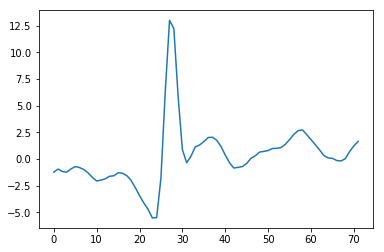

In [48]:
import matplotlib.pyplot as plt
rnd = np.random.randint(0, np_data_spikes.shape[0]);
plt.plot(np_data_spikes[rnd, 0, :])
np.argmax(np_data_spikes[rnd, 0, :])